In [1]:
import numpy as np
import matplotlib.pyplot as plt
import spectra as s

In [2]:
meanupper = s.avg_spec('_upper')

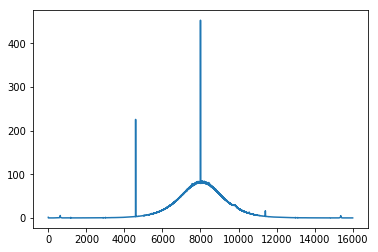

In [3]:
plt.plot(np.fft.fftshift(meanupper))
plt.show()

In [26]:
uppera = np.array([])
upperb = np.array([])

In [27]:
for i in range(10):
    npz = np.load('_upper' + str(i) + '.npz')
    data = npz['data']
    data.shape = (2, -1)
    uppera = np.append(uppera, data[0])
    upperb = np.append(upperb, data[1])

In [28]:
datac = 1j*uppera*0.1/(2**15) + (upperb*0.1/(2**15))
datac.shape = (-1, 16000)
ft_data = np.fft.fft(datac, axis=1)
meanspec = np.mean(np.abs(ft_data)**2, axis=0)

In [29]:
np.savez('uppermean', data=meanspec)

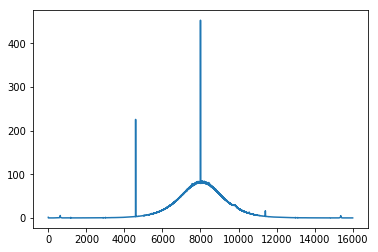

In [30]:
plt.plot(np.fft.fftshift(meanspec))
plt.show()

In [21]:
lowera = np.array([])
lowerb = np.array([])

In [22]:
for i in range(10):
    npz = np.load('lowerr/lowerr' + str(i) + '.npz')
    data = npz['data']
    data.shape = (2, -1)
    lowera = np.append(lowera, data[0])
    lowerb = np.append(lowerb, data[1])

In [23]:
datac = 1j*lowera*0.1/(2**15) + (lowerb*0.1/(2**15))
datac.shape = (-1, 16000)
ft_data = np.fft.fft(datac, axis=1)
meanspecl = np.mean(np.abs(ft_data)**2, axis=0)

In [25]:
np.savez('lowermean', data=meanspecl)

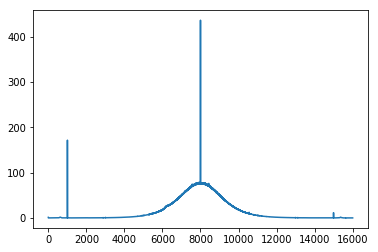

In [24]:
plt.plot(np.fft.fftshift(meanspecl))
plt.show()

In [33]:
son = meanspecl[:int(len(meanspecl)/2)]
son = np.append(son, meanspec[int(len(meanspec)/2):])

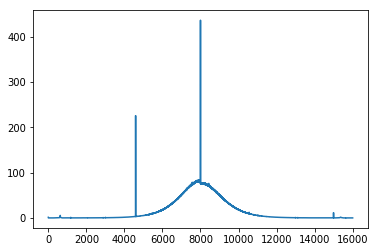

In [35]:
plt.plot(np.fft.fftshift(son))
plt.show()

In [39]:
soff = meanspec[:int(len(meanspec)/2)]
soff = np.append(soff, meanspecl[int(len(meanspecl)/2):])

<IPython.core.display.Javascript object>


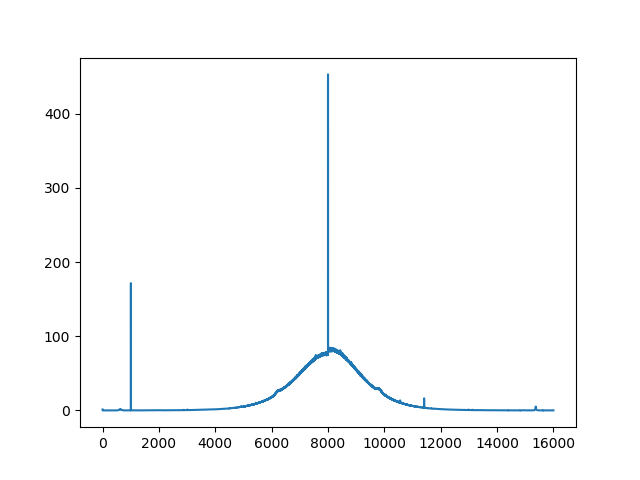

In [45]:
plt.plot(np.fft.fftshift(soff))
plt.show()

In [41]:
sline = son/soff

<IPython.core.display.Javascript object>


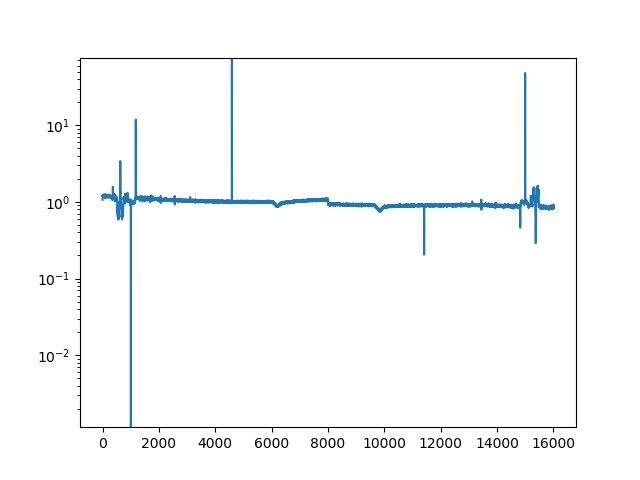

In [44]:
%matplotlib notebook
plt.plot(np.fft.fftshift(sline))
plt.show()

In [4]:
uppermean = np.load('uppermean.npz')
uppermean = uppermean['data']

In [5]:
lowermean = np.load('lowermean.npz')
lowermean = lowermean['data']

In [6]:
son = lowermean[:int(len(lowermean)/2)]
son = np.append(son, lowermean[int(len(lowermean)/2):])

In [10]:
soff = lowermean[:int(len(uppermean)/2)]
soff = np.append(soff, uppermean[int(len(uppermean)/2):])

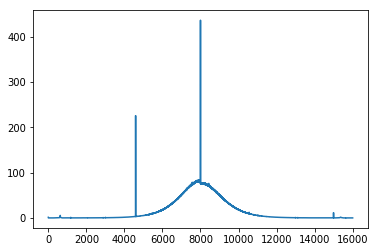

In [11]:
plt.plot(np.fft.fftshift(soff))
plt.show()

In [12]:
np.savez('soff.npz', data=soff)